## 💵 Bank Note Forgery Detection

Given *data about images of bank notes*, let's try to predict if a given note is **forged** or not.

We will use a logistic regression model to make our predictions.

Data source: https://www.kaggle.com/datasets/ritesaluja/bank-note-authentication-uci-data

### Importing Libraries

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('BankNote_Authentication.csv')
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


### Exploratory Data Analysis

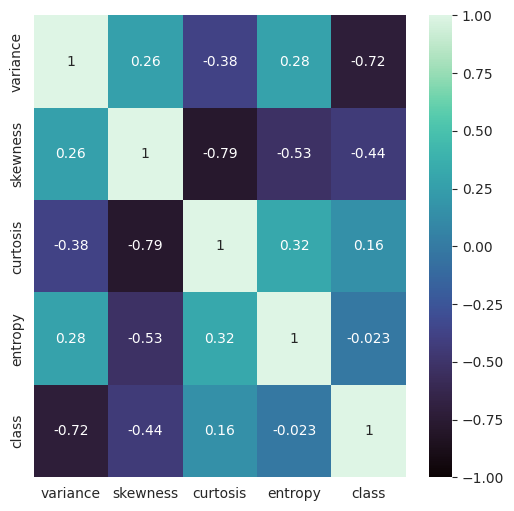

In [4]:
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(), annot=True, vmin=-1.0, cmap='mako')
plt.show()

<Figure size 1600x1600 with 0 Axes>

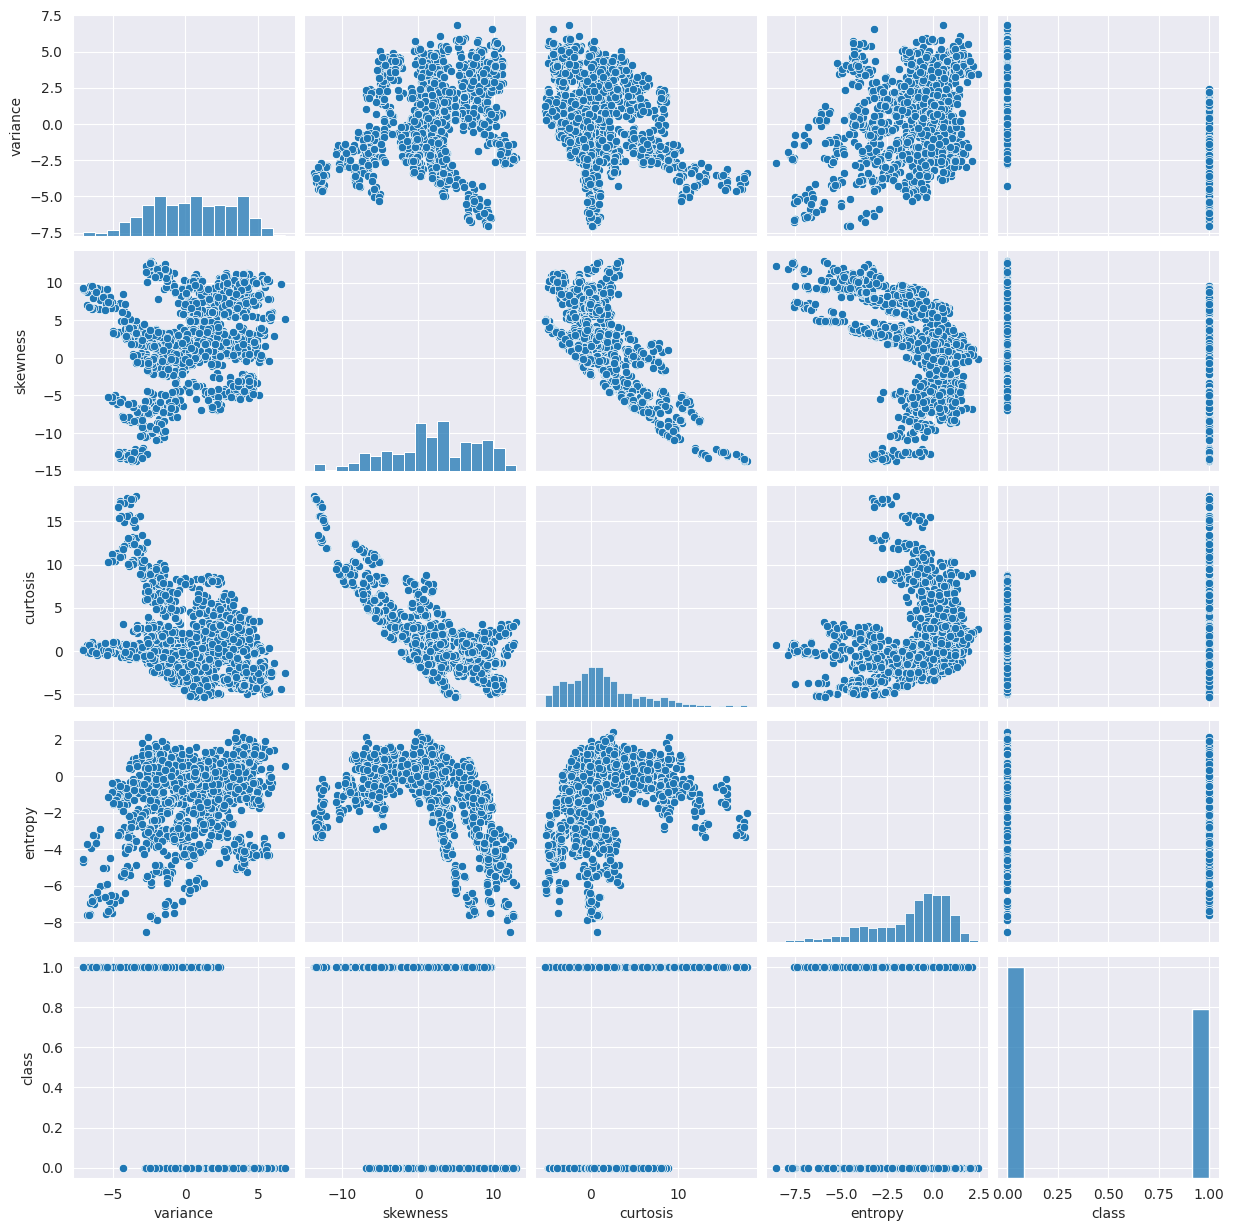

In [5]:
plt.figure(figsize=(16,16))
sns.pairplot(data)
plt.show()

In [6]:
y = data['class'].copy()
X = data.drop('class', axis=1).copy()

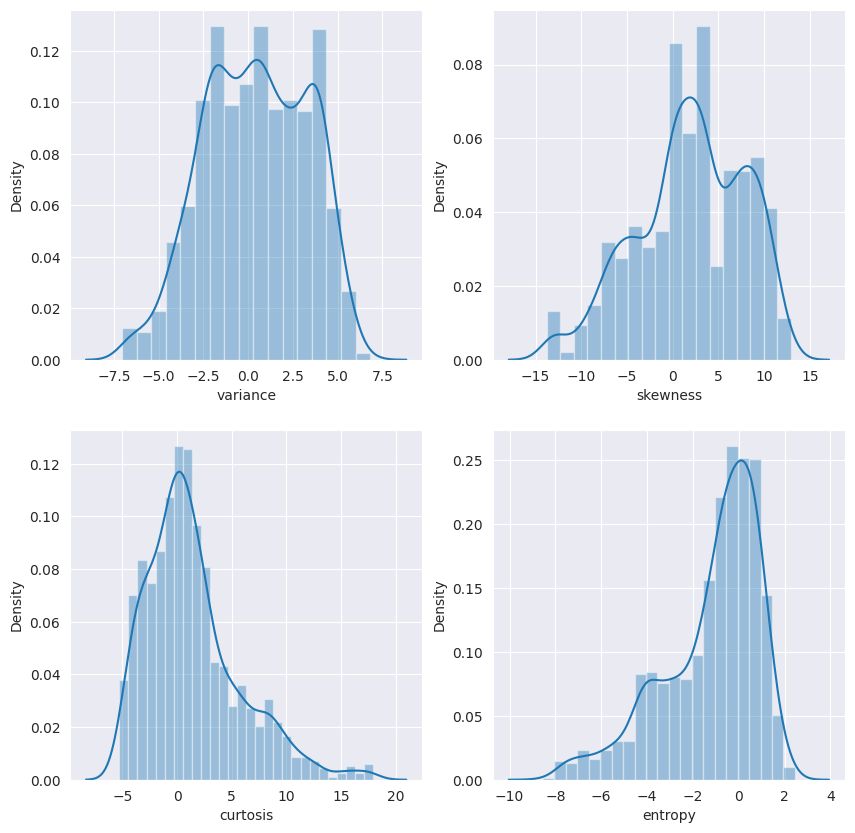

In [10]:
plt.figure(figsize=(10, 10))
for i in range(len(X.columns)):
    plt.subplot(2, 2, i+1)
    sns.distplot(X[X.columns[i]])
plt.show()

In [11]:
y.value_counts()

class
0    762
1    610
Name: count, dtype: int64

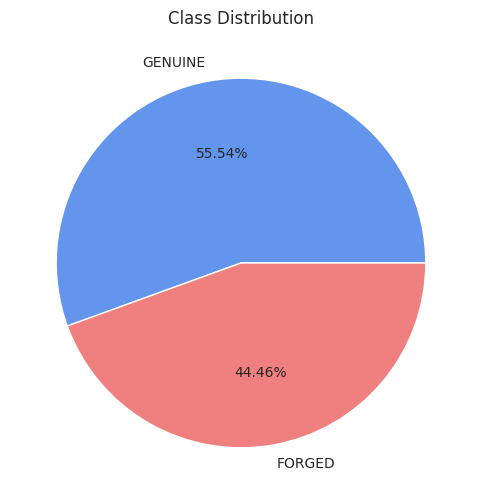

In [15]:
plt.figure(figsize=(6,6))
plt.pie(y.value_counts(), labels=['GENUINE', 'FORGED'], autopct='%.2f%%', colors=['cornflowerblue', 'lightcoral'])
plt.title('Class Distribution')
plt.show()

### Preprocessing

In [31]:
df = data.copy()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [33]:
X_train.shape, X_test.shape

((960, 4), (412, 4))

In [34]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [35]:
X_train

,variance,skewness,curtosis,entropy
694,0.105279,-0.279831,0.225994,0.788028
880,-0.998406,-1.188899,1.313246,0.528302
1251,-0.436302,-0.321052,-0.319095,0.388259
812,-0.896365,-0.160137,-0.424637,0.033532
1212,-1.035596,-0.386502,0.031673,0.338288
...,...,...,...,...
715,1.087157,1.153920,-1.052646,0.274743
905,0.106946,0.291501,-1.387911,-1.418754
1096,-1.717542,0.716752,-0.171671,-2.051099
235,0.571424,0.010907,0.220348,0.517197


In [36]:
X_train.mean(), X_train.var()

(variance   -2.590520e-17
 skewness    3.700743e-18
 curtosis    4.625929e-17
 entropy     7.864080e-17
 dtype: float64,
 variance    1.001043
 skewness    1.001043
 curtosis    1.001043
 entropy     1.001043
 dtype: float64)

In [37]:
y_train

694     0
880     1
1251    1
812     1
1212    1
       ..
715     0
905     1
1096    1
235     0
1061    1
Name: class, Length: 960, dtype: int64

### Training

In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Results

In [39]:
print("Test Accuracy: {:.2f}%".format(model.score(X_test, y_test)*100))

Test Accuracy: 97.82%


In [40]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,

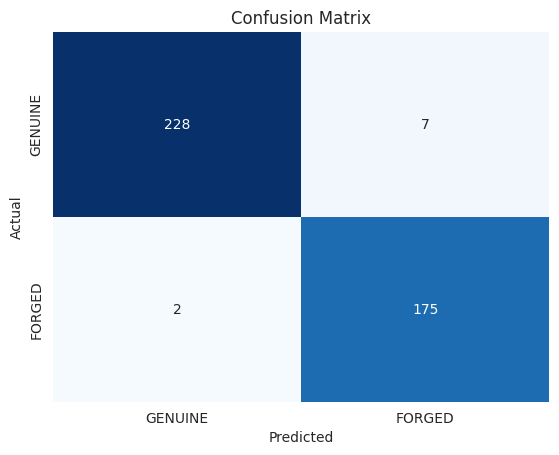

Classification Report:
------------------------------
               precision    recall  f1-score   support

     GENUINE       0.99      0.97      0.98       235
      FORGED       0.96      0.99      0.97       177

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



In [42]:
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=["GENUINE", "FORGED"])

plt.plot(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks(np.arange(2) + 0.5, ["GENUINE", "FORGED"])
plt.yticks(np.arange(2) + 0.5, ["GENUINE", "FORGED"])
plt.show()

print("Classification Report:\n------------------------------\n", clr)